In [196]:
from roboflow import Roboflow
rf = Roboflow(api_key="vzozkwMHdYEAgk1gvqZY")
project = rf.workspace().project("number-plate-detection-cr8os")
model = project.version(1).model

# infer on a local image
x = model.predict("image1.jpg", confidence=91, overlap=89).json()



loading Roboflow workspace...
loading Roboflow project...


In [197]:
x

{'predictions': [{'x': 190.5,
   'y': 212.0,
   'width': 127.0,
   'height': 32.0,
   'confidence': 0.9462116956710815,
   'class': 'license-plate',
   'image_path': 'image1.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 322.5,
   'y': 235.5,
   'width': 569.0,
   'height': 365.0,
   'confidence': 0.9372074604034424,
   'class': 'vehicle',
   'image_path': 'image1.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '650', 'height': '457'}}

In [198]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

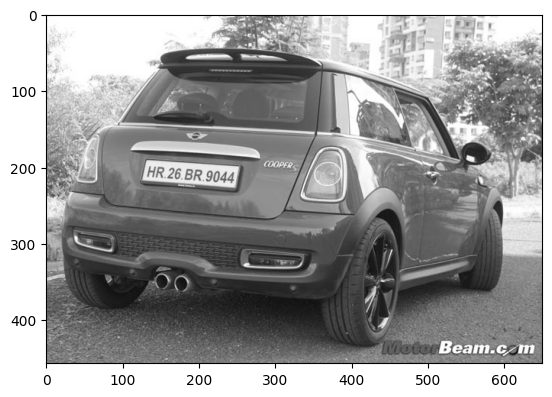

In [199]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [200]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction

In [206]:
a =  [[int(x['predictions'][1]['x']+x['predictions'][1]['width']),int(x['predictions'][1]['y'])]]
b =  [[int(x['predictions'][1]['x']+x['predictions'][1]['width']),int(x['predictions'][1]['y']+x['predictions'][1]['height'])]]
c = [[int(x['predictions'][1]['x']),int(x['predictions'][1]['y'] +x['predictions'][1]['height'])]]
d =  [[int(x['predictions'][1]['x']),int(x['predictions'][1]['y'])]]

In [207]:
location = np.array([a,d,c,b],dtype='int32')

In [208]:
location

array([[[891, 235]],

       [[322, 235]],

       [[322, 600]],

       [[891, 600]]])

In [213]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

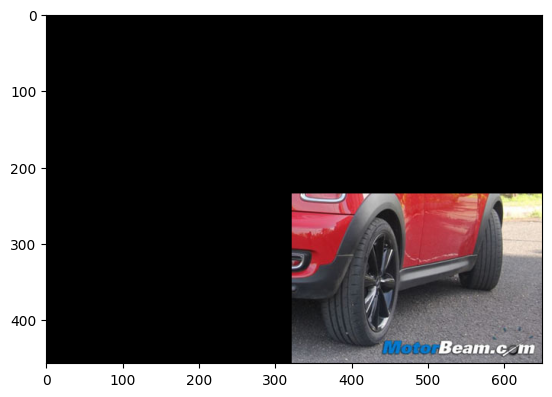

In [214]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))